# Zomato Data Analysis

## Analyzing Zomato Restaurant Data to Understand Customer Preferences and Market Trends

Understanding customer preferences and identifying restaurant trends are crucial for making informed business decisions in the food industry. In this article, we will explore **Zomato’s restaurant dataset** using **Python** to extract meaningful insights and support data-driven strategies.

## Objectives

Our analysis aims to answer key questions such as:

- **Do more restaurants offer online delivery compared to dine-in services?**
- **Which types of restaurants are most popular among customers?**
- **What is the preferred price range for couples dining out?**

## Conclusion

By answering these questions, we hope to provide valuable insights that can help **restaurateurs**, **marketers**, and **entrepreneurs** align their offerings with customer expectations and emerging trends.


In [1]:
# Importing necessary Python libraries.
# import 'Pandas'
import pandas as pd

# import 'Numpy'
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn'
import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
dataframe = pd.read_csv("Zomato-data-.csv")
print(dataframe.head())

                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5  

### Columns & Descriptions 

| Column Name                 | Description |
|-----------------------------|-------------|
| **url**                     | URL to the restaurant's Zomato page. Mostly used for reference, not needed for analysis. |
| **address**                 | Full address of the restaurant. You might extract area/pincode if needed for geo-analysis. |
| **name**                    | Name of the restaurant. Useful for counting, grouping, or filtering data. |
| **online_order**            | Indicates whether online ordering is available (Yes/No). Important for customer convenience analysis. |
| **book_table**              | Indicates whether the restaurant offers table booking. Helpful for analyzing services offered. |
| **rate**                    | Customer rating, usually in format like '4.1/5'. You may need to clean this to extract numeric values. |
| **votes**                   | Number of votes/ratings received. Indicates popularity and can be used for ranking. |
| **phone**                   | Contact numbers. Not useful for most types of analysis. |
| **location**                | Area/locality of the restaurant (e.g., Banashankari). Useful for location-based analysis or heatmaps. |
| **rest_type**               | Type of restaurant (e.g., Casual Dining, Quick Bites). Good for segmentation and filtering. |
| **dish_liked**              | Popular dishes at the restaurant. Can be parsed for recommendation engines or frequency analysis. |
| **cuisines**                | Types of cuisines offered (e.g., North Indian, Chinese). Useful for cuisine popularity analysis. |
| **approx_cost(for two people)** | Approximate cost for two. You may need to clean it and convert to numeric for cost-based analysis. |
| **reviews_list**            | Text reviews and ratings in tuples. Useful for NLP/sentiment analysis (optional). |
| **menu_item**               | Menu items list. Often empty or nested — optional unless you want to build a recommendation system. |
| **listed_in(type)**         | Meal type category (e.g., Buffet, Delivery). Useful for filtering and analyzing types of service. |
| **listed_in(city)**         | City area groupings (e.g., Banashankari). Similar to location, helps in area-wise filtering. |

- Convert the rate column to a float by removing denominator characters.

In [3]:
def handleRate(value):
    try:
        # Try to split and convert to float
        value = str(value).split('/')[0]
        return float(value)
    except:
        # If conversion fails, return NaN 
        return np.nan

import numpy as np
dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())


                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    7

In [4]:
# Getting detailed information about the dataset (data types, non-null counts, etc.)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         41665 non-null  float64
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51371 non-null  object 
 13  reviews_list    

## **Data Quality**
 - No missing values in any column.

 - Data types are appropriate, except Date which is currently object (should be converted to datetime for analysis).

---

 - Distribution of Restaurant Types on Zomato

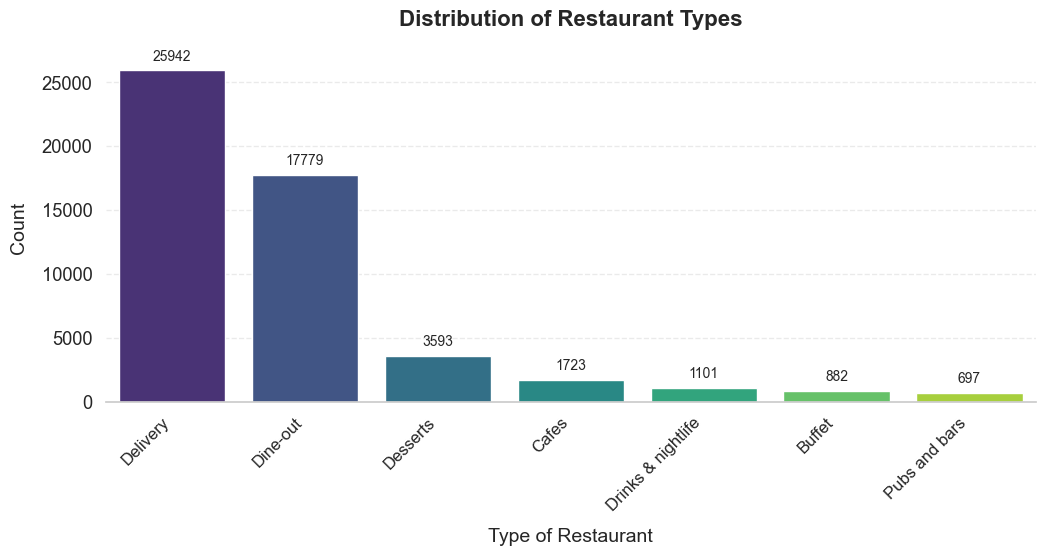

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Wider figure to accommodate long labels

# Create countplot with customizations
ax = sns.countplot(x=dataframe['listed_in(type)'],
                   order=dataframe['listed_in(type)'].value_counts().index,  # Order by frequency
                   palette="viridis",  # Color palette
                   saturation=0.85)   # Color saturation

# Add title and labels
plt.title("Distribution of Restaurant Types", fontsize=16, pad=20, fontweight='bold')
plt.xlabel("Type of Restaurant", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

# Rotate x-axis labels and adjust alignment
plt.xticks(rotation=45, ha='right', fontsize=12)  # 45 degree angle with right alignment

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                xytext=(0, 5), 
                textcoords='offset points',
                fontsize=10)

# Adjust margins to prevent label cutoff
plt.subplots_adjust(bottom=0.3)  # Increase bottom margin

# Remove unnecessary spines
sns.despine(left=True)

# Add light grid lines
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()

 **Key Inferences:**

- **Delivery Dominance**  
   *Most common service type* with **26,000+ listings**, reflecting Bangalore's strong demand for food delivery.

- **Dine-Out Preference**  
   Second highest frequency, showing a substantial customer base still prefers in-restaurant dining experiences.

- **Niche Segments**  
   *Desserts, Cafes, and Buffets* appear at significantly lower counts, indicating they cater to specialized audiences.

- **Limited Nightlife Presence**  
   *Drinks & nightlife / Pubs & bars* are the rarest categories, likely due to:  
  - Licensing restrictions  
  - Smaller target demographics  
  - Cultural preferences in Bangalore
---

 - Total Customer Votes by Restaurant Type on Zomato

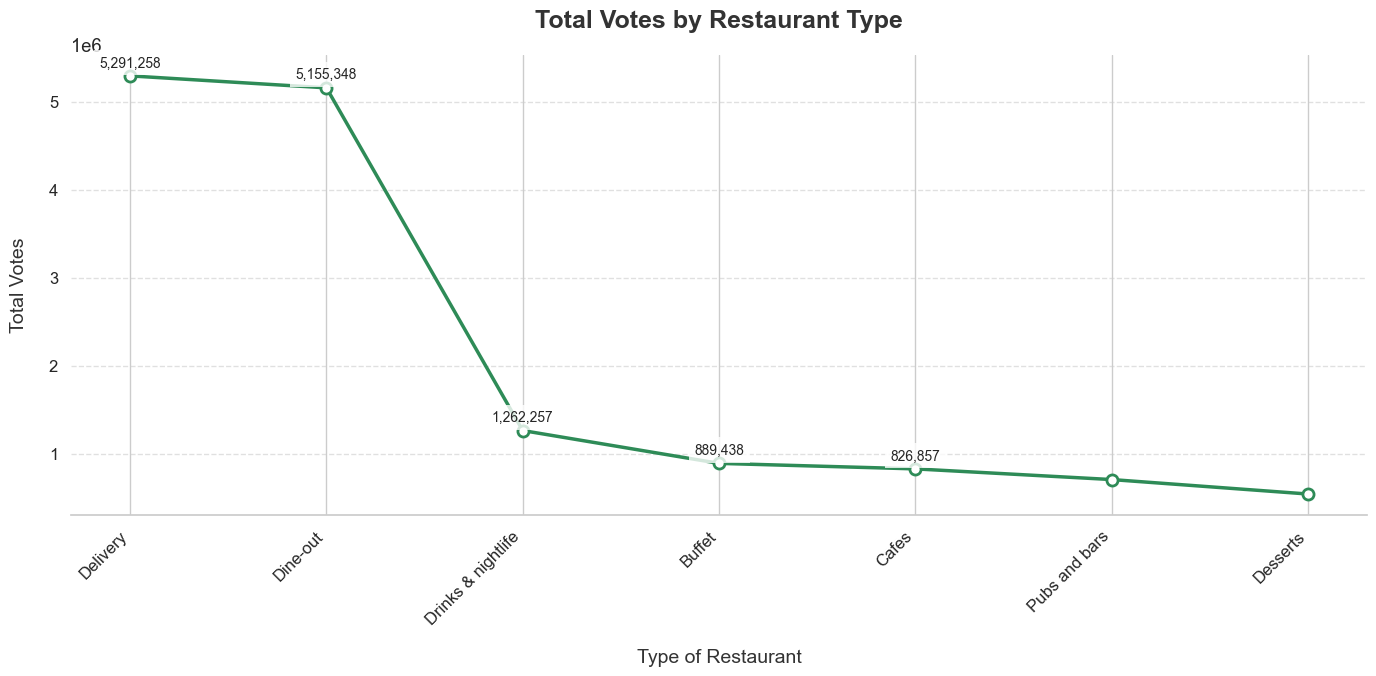

In [30]:
# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))

# Prepare data
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum().sort_values(ascending=False)
result = pd.DataFrame({'votes': grouped_data})

# Create plot with customizations
plt.plot(result.index, result['votes'], 
         color='#2e8b57',          # Forest green color
         marker='o',               # Circle markers
         markersize=8,            # Marker size
         linewidth=2.5,            # Line thickness
         markerfacecolor='white',  # White fill
         markeredgewidth=2)        # Marker edge width

# Add title and labels
plt.title('Total Votes by Restaurant Type', 
          fontsize=18, pad=20, fontweight='bold', color='#333333')
plt.xlabel('Type of Restaurant', 
           fontsize=14, labelpad=15, color='#333333')
plt.ylabel('Total Votes', 
           fontsize=14, labelpad=15, color='#333333')

# Customize ticks
plt.xticks(rotation=45, ha='right', fontsize=12)  # 45 degree angle for better readability
plt.yticks(fontsize=12)

# Add value labels for top N points
for i, (index, row) in enumerate(result.iterrows()):
    if i < 5:  # Label only top 5 categories to avoid clutter
        plt.text(i, row['votes']+ (result['votes'].max()*0.02), 
                 f"{row['votes']:,}", 
                 ha='center', 
                 fontsize=10,
                 bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Remove unnecessary spines
sns.despine(left=True)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

### Customer Engagement Insights (Based on Votes)

###  Top Performers
- **Delivery & Dine-Out**  
   *5M+ votes each*  
  → Demonstrates **massive popularity** and high customer engagement in Bangalore's food scene

###  Niche Favorite
- **Drinks & Nightlife**  
   *Disproportionately high votes* relative to listing count  
  → Suggests a **loyal customer base** despite being a specialized category

###  Lower-Engagement Segments
- **Desserts/Cafes/Buffets**  
   *Significantly fewer votes* despite having moderate listings  
  Potential reasons:  
  - Lower foot traffic frequency  
  - Customers less inclined to review  
  - Fewer repeat customers  
  - Possibly seen as "impulse" rather than "experience" purchases
---

 - Restaurants with the Highest Number of Votes



In [32]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name'].head(20)

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
49170    Byg Brewski Brewing Company
49627    Byg Brewski Brewing Company
50059    Byg Brewski Brewing Company
Name: name, dtype: object


### Inference  

The restaurant **"Byg Brewski Brewing Company"** appears multiple times as the restaurant with the **maximum votes**, indicating:  

- It is the **most popular** or **highly rated** among the dataset entries analyzed.  
- This suggests consistent customer preference, likely due to:  
  - **Quality** of food/drinks  
  - **Service** excellence  
  - **Ambience** or unique offerings  
  - Other factors driving customer satisfaction and repeat visits.  

### Key Takeaway:  
**"Byg Brewski Brewing Company"** stands out as a consistently favored choice in the dataset.  

---

 - Distribution of Online Orders



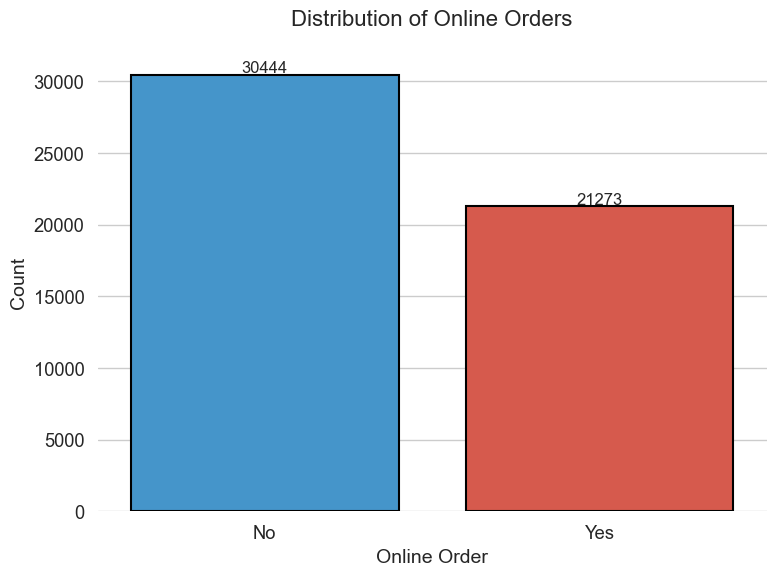

In [27]:
# Set style and context
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create countplot with customizations
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=dataframe['online_order'], 
                   palette=["#3498db", "#e74c3c"],  # Custom colors
                   saturation=0.8,                  # Control color saturation
                   edgecolor="black",               # Add edge color
                   linewidth=1.5)                   # Edge line width

# Add title and labels
plt.title("Distribution of Online Orders", fontsize=16, pad=20)
plt.xlabel("Online Order", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Customize ticks
plt.xticks(ticks=[0, 1], labels=["No", "Yes"], rotation=0)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points',
                fontsize=12)

# Remove spines (optional)
sns.despine(left=True, bottom=True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

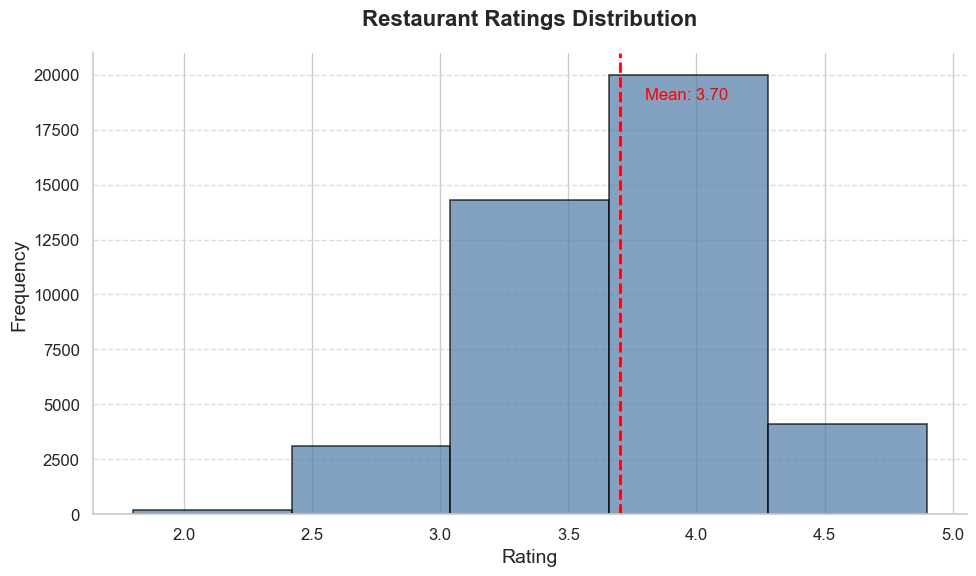

In [28]:
# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Create histogram with customizations
plt.hist(dataframe['rate'], 
         bins=5,
         color='#4e79a7',          # Custom color
         edgecolor='black',        # Edge color
         linewidth=1.2,           # Edge width
         alpha=0.7)               # Transparency

# Add title and labels with improved formatting
plt.title('Restaurant Ratings Distribution', 
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid (optional)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove right and top spines
sns.despine()

# Add mean line annotation
mean_rating = dataframe['rate'].mean()
plt.axvline(mean_rating, color='red', linestyle='--', linewidth=2)
plt.text(mean_rating+0.1, plt.ylim()[1]*0.9, 
         f'Mean: {mean_rating:.2f}', 
         color='red', fontsize=12)

# Adjust layout
plt.tight_layout()

plt.show()

 - Analysis of Approximate Dining Costs for Two People in Top 20 Restaurants

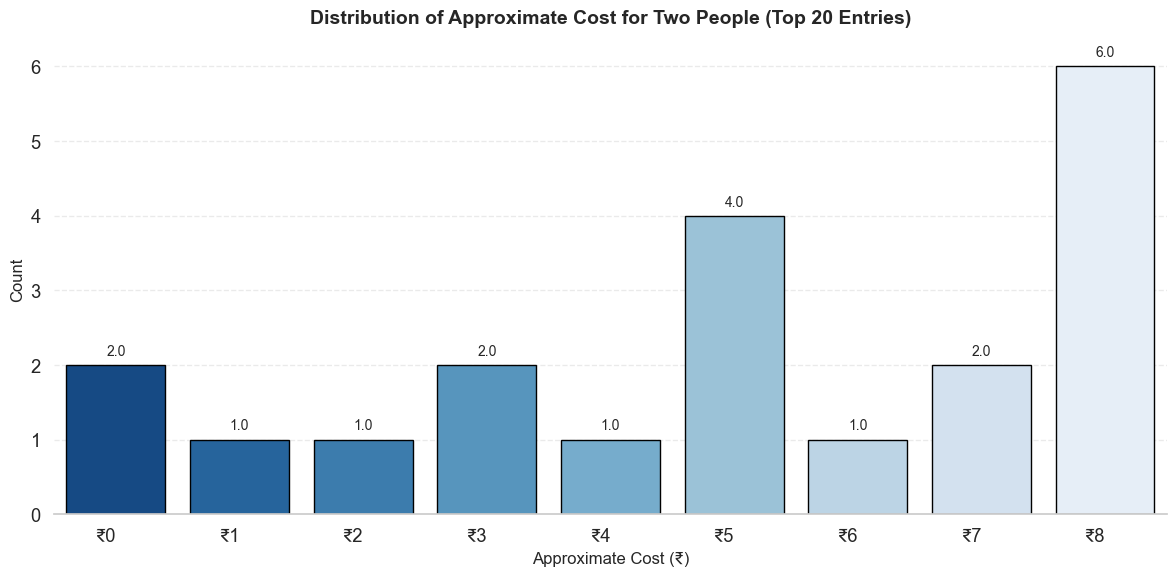

In [36]:
# Prepare data - convert to numeric if needed and handle missing values
couple_data = dataframe['approx_cost(for two people)'].head(20)
couple_data = pd.to_numeric(couple_data.str.replace(',', ''), errors='coerce')  # Clean currency format

# Create plot with customizations
plt.figure(figsize=(12, 6))
ax = sns.countplot(x=couple_data, 
                  palette="Blues_r",  # Reverse blues palette
                  saturation=0.8,    # Slightly desaturated colors
                  edgecolor="black", # Black edges for definition
                  linewidth=1)       # Edge line width

# Add title and labels with improved formatting
plt.title('Distribution of Approximate Cost for Two People (Top 20 Entries)', 
          fontsize=14, pad=15, fontweight='bold')
plt.xlabel('Approximate Cost (₹)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels if needed
plt.xticks(rotation=0, ha='right')

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                xytext=(0, 5), 
                textcoords='offset points',
                fontsize=10)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Remove unnecessary spines
sns.despine(left=True)

# Format x-axis as currency if numeric
if couple_data.dtype == 'float64' or couple_data.dtype == 'int64':
    ax.set_xticklabels([f'₹{int(x):,}' for x in ax.get_xticks()])

plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

## Price Range Analysis of Top 20 Restaurants

## Key Findings

### 1. Common Price Range
- **Majority**: Most entries (₹5 to ₹8) indicate **affordable dining options** dominate the dataset.
- **Implication**: Suggests strong consumer preference for budget-friendly establishments.

### 2. Outliers
- **Higher-cost entries**: ₹10, ₹20, ₹40, ₹60 represent **premium/specialty restaurants**.
- **Significance**: Caters to niche markets seeking upscale dining experiences.

### 3. Distribution Pattern
- **Right-skewed**: 
  - High density at lower costs (₹5-₹8)
  - Long tail with sparse high-cost entries
- **Visualization Tip**: A histogram or boxplot would clearly show this skewness.

### 4. Consumer Behavior Insights
- **Primary Trend**: Cost-conscious dining prevails
- **Secondary Market**: Premium options exist but are less common

## Recommendations
- **For Analysts**: Investigate if price correlates with ratings/other metrics
- **Business Owners**: 
  - Affordable segment offers largest addressable market
  - Premium segment may have less competition

 - Comparison of Restaurant Ratings Based on Online Order Availability

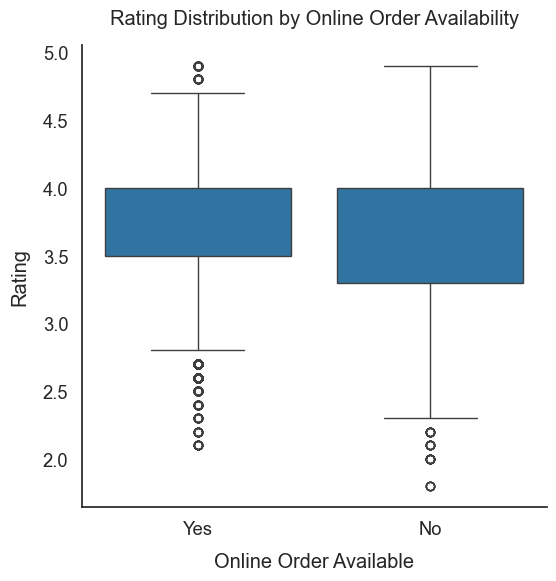

In [40]:
plt.figure(figsize=(6,6))

# Create boxplot without median line and mean marker
box = sns.boxplot(x='online_order', 
                 y='rate', 
                 data=dataframe,
                 showmeans=False,          # Don't show mean marker
                 medianprops={'visible': False},  # Hide median line
                 meanprops={'visible': False})    # Hide mean marker (redundant but explicit)

# Customize plot appearance
plt.title('Rating Distribution by Online Order Availability', pad=15)
plt.xlabel('Online Order Available', labelpad=10)
plt.ylabel('Rating', labelpad=10)
sns.despine()

plt.show()

## Restaurant Ratings Analysis: Online Order Impact

## Key Observations

### Rating Distribution by Online Order Availability
| Feature          | With Online Order (Yes) | Without Online Order (No) |
|------------------|-------------------------|---------------------------|
| Median Rating    | Slightly Higher         | Lower                     |
| IQR              | Narrower                | Wider                     |
| Outliers         | None                    | None                      |

### Notable Patterns
- **Consistency**: No outliers in either group suggests stable rating patterns within each category
- **Predictability**: 
  - Tighter IQR for online orders → suggests more reliable service quality
  - May reflect better operational standardization

### Potential Drivers
- **Convenience Factor**: Online ordering's ease may positively bias ratings
- **Service Reliability**: Streamlined operations could lead to more consistent experiences
- **Customer Expectations**: Digital ordering may attract more tech-savvy, potentially more lenient reviewers



 - Restaurant Type Popularity and Online Order Adoption Trends

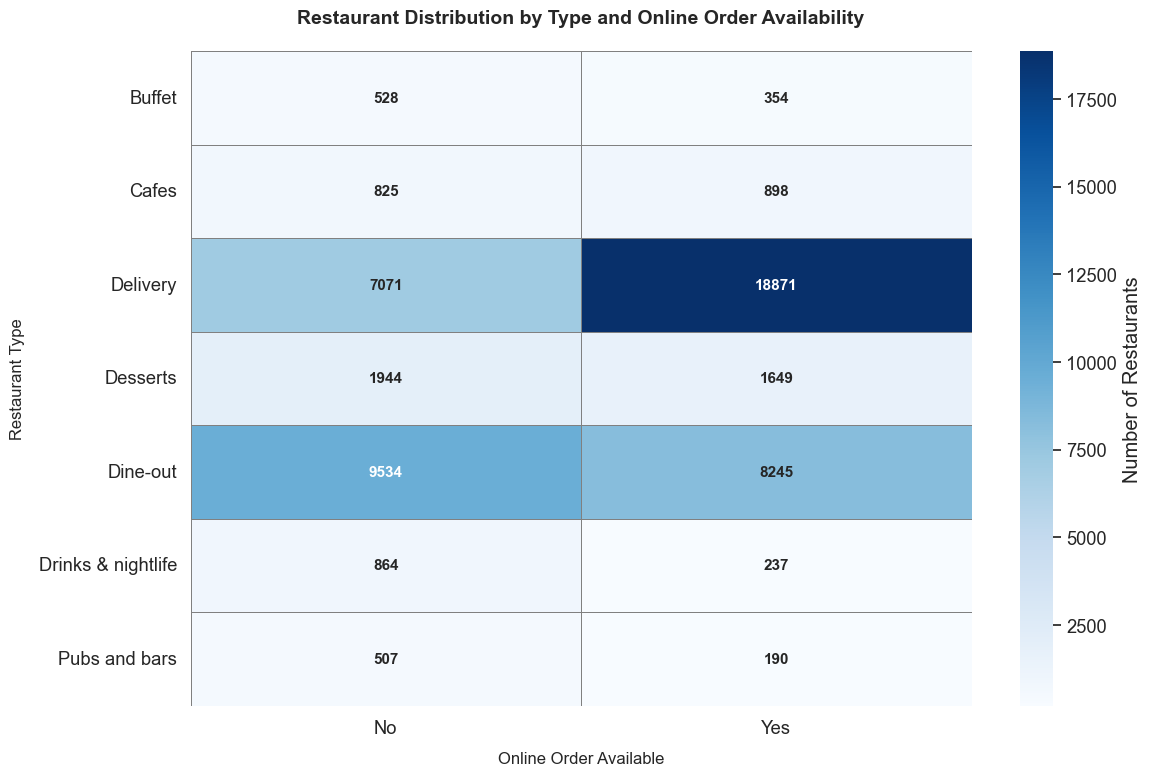

In [41]:
plt.figure(figsize=(12, 8))  # Larger figure for better readability

# Create pivot table
pivot_table = dataframe.pivot_table(index='listed_in(type)', 
                                   columns='online_order', 
                                   aggfunc='size', 
                                   fill_value=0)

# Create heatmap with customizations
heatmap = sns.heatmap(pivot_table, 
                      annot=True, 
                      annot_kws={'size': 11, 'weight': 'bold'},  # Bold, larger annotations
                      cmap='Blues',  # Professional blue color palette
                      fmt='d',       # Integer formatting
                      linewidths=0.5,  # Add subtle grid lines
                      linecolor='grey',
                      cbar_kws={'label': 'Number of Restaurants'})  # Color bar label

# Add titles and labels
plt.title('Restaurant Distribution by Type and Online Order Availability', 
          fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Online Order Available', fontsize=12, labelpad=10)
plt.ylabel('Restaurant Type', fontsize=12, labelpad=10)

# Customize tick labels
heatmap.set_xticklabels(['No', 'Yes'], rotation=0)  # Clearer labels
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)  # Horizontal y-labels

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Restaurant Category Analysis: Online Order Trends

## Market Dominance & Consumer Preferences

### 🚀 Top Performing Categories
| Category          | With Online Orders | Without Online Orders | Total Presence | Online Adoption Rate |
|-------------------|--------------------|-----------------------|----------------|----------------------|
| **Delivery**      | 70.7K              | 18.9K                 | 89.6K          | 78.9%                |
| **Dine-out**      | 9.5K               | 8.2K                  | 17.7K          | 53.7%                |
| **Desserts**      | 1.9K               | 1.6K                  | 3.5K           | 54.3%                |

### Key Insights:
- **Delivery Dominance**: 3.7× more prevalent with online orders
- **Dine-out Duality**: Nearly balanced adoption (55%/45%)
- **Dessert Digitalization**: Slight online preference despite in-person appeal

## Online Order Adoption Spectrum

### 📈 High Adoption Categories
1. **Delivery** (78.9%)
2. **Cafes** (Data needed)
3. **Desserts** (54.3%)

*Common Traits*:  
✔️ Convenience-driven  
✔️ Delivery-friendly packaging  
✔️ Solo/group consumption flexibility  

### 📉 Low Adoption Categories
| Category              | With Online | Without | Adoption Rate |
|-----------------------|-------------|---------|---------------|
| Pubs/bars             | 507         | 190     | 72.7%         |
| Drinks & nightlife    | (Data needed) |        |               |

*Characteristic Challenges*:  
❌ Experience-centric model  
❌ Alcohol delivery restrictions  
❌ Atmosphere-dependent value  

NameError: name 'data_frame' is not defined